### Instalación de YOLO (Ultralytics)

**Qué se hace:** se instala la librería `ultralytics` (YOLOv8/YOLO11 según versión disponible) y se verifica que quedó correctamente instalada.  
**Por qué se hace:** es la forma más simple y mantenida de usar YOLO en Colab (entrenar, validar, inferir, exportar).  
**Qué esperar:** al final verás la versión de Ultralytics, PyTorch y si hay GPU disponible.


In [1]:
# === Instalación de YOLO (Ultralytics) ===
!pip -q install --upgrade ultralytics

# === Verificación básica ===
import torch
import ultralytics
from ultralytics import YOLO

print("Ultralytics version:", ultralytics.__version__)
print("Torch version:", torch.__version__)
print("CUDA available:", torch.cuda.is_available())
if torch.cuda.is_available():
    print("GPU:", torch.cuda.get_device_name(0))


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 18.9 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics version: 8.4.7
Torch version: 2.9.0+cpu
CUDA available: False


### Carga interactiva de un archivo `.pt`

**Qué se hace:** se abre el selector de archivos de Colab para que subas tu archivo `.pt` (pesos entrenados o checkpoint).  
**Por qué se hace:** así puedes usar tu modelo entrenado directamente en Colab sin depender de rutas externas.  
**Qué esperar:** al subir el `.pt`, el notebook guardará el archivo localmente y cargará el modelo con `YOLO(path.pt)`.


In [2]:
from google.colab import files
import os

# Subir archivo .pt
uploaded = files.upload()

# Tomar el primer archivo subido (recomendado: subir solo 1 .pt)
pt_files = [fn for fn in uploaded.keys() if fn.lower().endswith(".pt")]

if not pt_files:
    raise ValueError("No se detectó ningún archivo .pt. Por favor sube un archivo con extensión .pt")

pt_path = pt_files[0]
print("Archivo .pt cargado:", pt_path)
print("Ruta absoluta:", os.path.abspath(pt_path))

# Cargar modelo YOLO desde el .pt
model = YOLO(pt_path)
print("Modelo cargado correctamente ")


Saving best.pt to best.pt
Archivo .pt cargado: best.pt
Ruta absoluta: /content/best.pt
Modelo cargado correctamente 


### Prueba rápida de inferencia

**Qué se hace:** ejecuta una inferencia sobre una imagen de ejemplo.  
**Por qué se hace:** confirma que los pesos `.pt` son válidos y compatibles con Ultralytics.  
**Qué esperar:** se generan predicciones y se guarda una imagen con detecciones en la carpeta `runs/`.



image 1/1 /content/sample.jpg: 224x224 Tomato___Late_blight 0.90, Tomato___healthy 0.04, Tomato___Septoria_leaf_spot 0.03, Tomato___Early_blight 0.02, Tomato___Leaf_Mold 0.01, 16.8ms
Speed: 25.5ms preprocess, 16.8ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)
Inferencia completada ✅


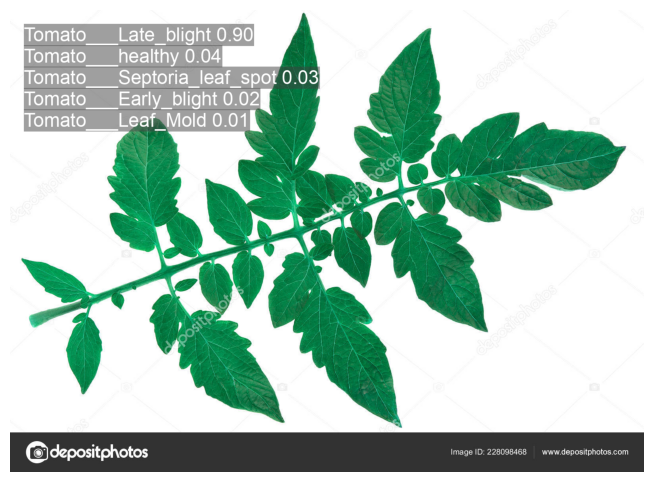

In [5]:
# Descargar una imagen de ejemplo
!wget -q https://st4.depositphotos.com/2125603/22809/i/1600/depositphotos_228098468-stock-photo-tomato-leaf-closeup-isolated-white.jpg -O sample.jpg

# Inferencia
results = model.predict(source="sample.jpg", conf=0.25)
print("Inferencia completada ✅")

# Mostrar resultados (render)
for r in results:
    im = r.plot()  # array con bounding boxes dibujadas

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.imshow(im)
plt.axis("off")
plt.show()


### Carga de imágenes para inferencia

**Qué se hace:** se solicita al usuario subir una o varias imágenes (`.jpg`, `.png`, etc.) desde su equipo.  
**Por qué se hace:** permite ejecutar inferencias directamente sobre imágenes reales sin depender de datasets externos.  
**Qué esperar:** las imágenes se guardan localmente en Colab y se listan para su posterior procesamiento.


In [6]:
from google.colab import files
import os

# Crear carpeta para imágenes de entrada
INPUT_DIR = "input_images"
os.makedirs(INPUT_DIR, exist_ok=True)

# Subir imágenes
uploaded_images = files.upload()

image_paths = []
for filename in uploaded_images.keys():
    if filename.lower().endswith((".jpg", ".jpeg", ".png")):
        dst = os.path.join(INPUT_DIR, filename)
        os.rename(filename, dst)
        image_paths.append(dst)

if not image_paths:
    raise ValueError("No se subieron imágenes válidas (.jpg, .png)")

print(f"Imágenes cargadas ({len(image_paths)}):")
for p in image_paths:
    print(" -", p)


Saving healthy.JPG to healthy.JPG
Imágenes cargadas (1):
 - input_images/healthy.JPG


### Inferencia con el modelo YOLO entrenado

**Qué se hace:** se ejecuta el modelo YOLO cargado desde el `.pt` sobre las imágenes subidas.  
**Por qué se hace:** para detectar objetos usando el modelo entrenado por el usuario.  
**Qué esperar:** YOLO generará predicciones (bounding boxes, clases y confidencias) y guardará los resultados en `runs/detect/`.


In [7]:
# Inferencia sobre todas las imágenes subidas
results = model.predict(
    source=image_paths,
    conf=0.25,        # umbral de confianza (ajustable)
    save=True,        # guarda imágenes con detecciones
    imgsz=640         # tamaño de entrada
)

print("Inferencia completada ")
print("Resultados guardados en la carpeta: runs/detect/")



0: 640x640 Tomato___healthy 0.55, Tomato___Tomato_Yellow_Leaf_Curl_Virus 0.13, Tomato___Leaf_Mold 0.11, Tomato___Late_blight 0.09, Tomato___Tomato_mosaic_virus 0.05, 101.1ms
Speed: 18.0ms preprocess, 101.1ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to /content/runs/classify/predict
Inferencia completada 
Resultados guardados en la carpeta: runs/detect/


### Visualización de resultados

**Qué se hace:** se muestran las imágenes con detecciones directamente en el notebook.  
**Por qué se hace:** permite validar visualmente la calidad del modelo.  
**Qué esperar:** imágenes con bounding boxes, etiquetas de clase y confianza.


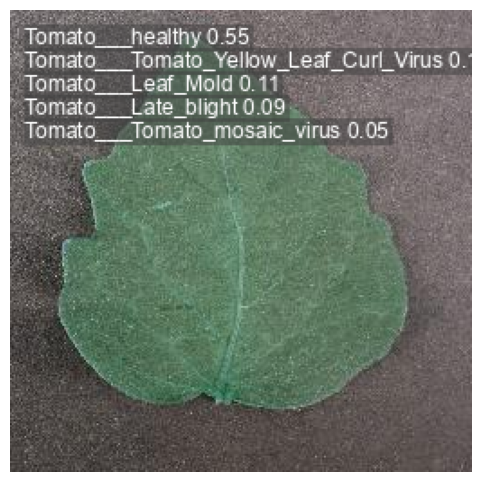

In [8]:
import matplotlib.pyplot as plt

for r in results:
    annotated_img = r.plot()  # imagen con detecciones dibujadas
    plt.figure(figsize=(8, 6))
    plt.imshow(annotated_img)
    plt.axis("off")
    plt.show()
